In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats


df = pd.read_csv('data/Creditcard_data.csv')

## First step: Visualization of the data

In [59]:
def class_distribution(y): #Simply counting the number of samples in each class
    counts = y.value_counts()
    distribution = counts/len(y)
    return distribution

def plot_class_distribution(y): #Bar chart to visualize the distribution of classes
    plt.figure(figsize=(8,6))
    perct = y.value_counts(normalize = True)*100

    sns.barplot(x = perct.index, y = perct.values)
    plt.title('Class Distr. (percentage)')
    plt.ylabel('Percentage')
    plt.xlabel('Class')
    plt.show()

def imbalance_ratio(y): #Finding the imbalance ratio
    counts = y.value_counts()
    ratio = counts.max()/counts.min()
    return ratio

def gini_coefficient(y):#Finds the gini coefficient, a measure of statistical dispersion
    counts = y.value_counts()
    p = counts/len(y)
    gini = 1-sum(p**2)
    return gini



In [60]:
y = df['Class']
print(y)

0      0
1      1
2      0
3      0
4      0
      ..
767    0
768    0
769    0
770    0
771    0
Name: Class, Length: 772, dtype: int64


In [61]:
class_dist = class_distribution(y)
print("Class Distribution: ")
print(class_dist)

Class Distribution: 
0    0.988342
1    0.011658
Name: Class, dtype: float64


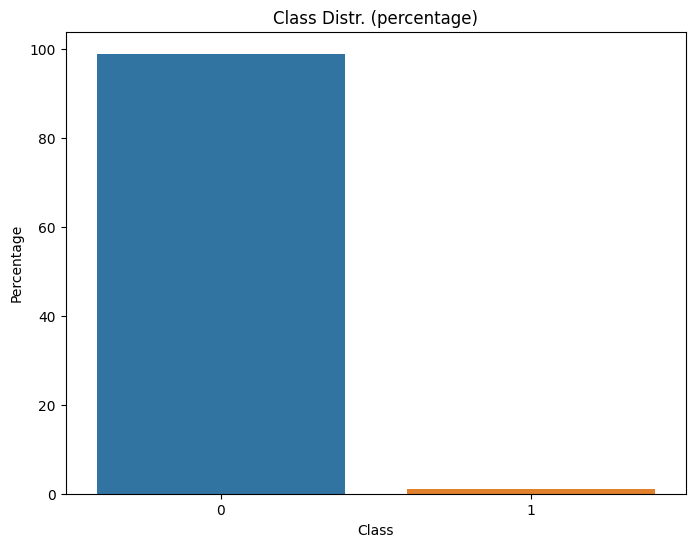

In [62]:
plot_class_distribution(y)

In [63]:
imbal_ratio = imbalance_ratio(y)
print(f"Imbalance Ratio: {imbal_ratio}")

gini_coeff = gini_coefficient(y)
print(f'Gini Coefficient: {gini_coeff}')


Imbalance Ratio: 84.77777777777777
Gini Coefficient: 0.02304424279846451


## Inference:
-   Clearly the data is too much imbalanced and we wont be able to train a model properly on this
-   Following cells we will implement our sampling techniques 


## Sampling: 
1.  Oversampling:
    -   Random Oversampling: balance the class distribution by randomly duplicating the instances of the minority class
    -   SMOTE: Generates synthetic samples by focusing on the minority samples
2.  Undersampling:
    -   Random Undersampling: balance the class distribution by randomly duplicating the instances of the majority class
    -   Tomek Links: Identifies and remove instances that are considered ambiguous or near the decision boundary between classes
    -   Near miss: Identifies instances which are close to instances from minority class, aiming to retain the instances that are more difficult to classify correctly
###
**We will use imbalanced-learn library**

In [65]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

## Evaluating each sampling technique on different models: 
1. **RandomForest Classifier** 
2. **XGBoost Classifier**
3. **LightGBM Classifier**
4. **Support Vector Classifiers (SVC)**
5. **CatBoost**

In [73]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop(columns = 'Class')
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [75]:
models = {
   'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'XGBoost': XGBClassifier(random_state=42, verbosity=0),
    'LightGBM': LGBMClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42)
}

samplers = {
    'RandomOverSampler': RandomOverSampler(sampling_strategy='auto', random_state=42),
    'SMOTE': SMOTE(sampling_strategy='auto', random_state=42),
    'RandomUnderSampler': RandomUnderSampler(sampling_strategy='auto', random_state=42),
    'NearMiss': NearMiss(sampling_strategy='auto', version=1),
    'TomekLinks': TomekLinks(sampling_strategy='auto')
}





In [80]:
results_table = pd.DataFrame(columns = ['Model', 'Sampler', 'Accuracy'])

for model_name, model in models.items():
    for sampler_name, sampler in samplers.items():

        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        model.fit(X_resampled, y_resampled)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results_table = results_table.append({
            'Model':model_name,
            'Sampler':sampler_name,
            'Accuracy':accuracy, 
            # 'Precision':precision, 
            # 'Recall':recall, 
            # 'F1 Score':f1
        }, ignore_index = True)

c:\Users\avard\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avard\AppData\Local\Temp\ipykernel_14748\3991254228.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({
c:\Users\avard\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avard\AppData\Local\Temp\ipykernel_14748\3991254228.py:16: FutureWarning: The frame.append method is 

[LightGBM] [Info] Number of positive: 609, number of negative: 609
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7630
[LightGBM] [Info] Number of data points in the train set: 1218, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

c:\Users\avard\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avard\AppData\Local\Temp\ipykernel_14748\3991254228.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({
c:\Users\avard\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avard\AppData\Local\Temp\ipykernel_14748\3991254228.py:16: FutureWarning: The frame.append method is 

In [84]:
print(results_table)

           Model             Sampler  Accuracy
0       CatBoost   RandomOverSampler  0.993548
1       CatBoost               SMOTE  0.993548
2       CatBoost  RandomUnderSampler  0.741935
3       CatBoost            NearMiss  0.341935
4       CatBoost          TomekLinks  0.993548
5        XGBoost   RandomOverSampler  0.993548
6        XGBoost               SMOTE  0.993548
7        XGBoost  RandomUnderSampler  0.683871
8        XGBoost            NearMiss  0.103226
9        XGBoost          TomekLinks  0.993548
10      LightGBM   RandomOverSampler  0.993548
11      LightGBM               SMOTE  0.993548
12      LightGBM  RandomUnderSampler  0.993548
13      LightGBM            NearMiss  0.993548
14      LightGBM          TomekLinks  0.993548
15           SVC   RandomOverSampler  0.696774
16           SVC               SMOTE  0.670968
17           SVC  RandomUnderSampler  0.625806
18           SVC            NearMiss  0.348387
19           SVC          TomekLinks  0.993548
20  RandomFor

In [88]:
pivoted_results = results_table.pivot(index='Model', columns='Sampler', values='Accuracy')


In [89]:
print(pivoted_results)

Sampler       NearMiss  RandomOverSampler  RandomUnderSampler     SMOTE  \
Model                                                                     
CatBoost      0.341935           0.993548            0.741935  0.993548   
LightGBM      0.993548           0.993548            0.993548  0.993548   
RandomForest  0.393548           0.993548            0.709677  0.993548   
SVC           0.348387           0.696774            0.625806  0.670968   
XGBoost       0.103226           0.993548            0.683871  0.993548   

Sampler       TomekLinks  
Model                     
CatBoost        0.993548  
LightGBM        0.993548  
RandomForest    0.993548  
SVC             0.993548  
XGBoost         0.993548  


### TomekLinks give the best accuracy for each model